# Exploration of San Francisco Data Set
In this exploration, we visulize some of the raw parameters and relationships amongst them. 

First, to explain what is in this dataset. Raw variables which are provided include: dates (timestamp), category of incident, description of incident, day of the week, police department district, resolution, address, and coordinates (latitude and longitude). Category, description, and resolution are only provided in the training data set. 

With this in mind, we just get a sense of the raw data:

In [1]:
#import all the packages for this notebook, create helper functions
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def ReadSFData(data_file):
    return pd.read_csv(data_file)

/home/vpreston/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/vpreston/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#import the data file and read it
tr_master = ReadSFData('../train.csv')
# print tr_master.info()
test_data = ReadSFData('../test.csv')
# print test_data.info()

First, I look to develop some recoded information from this data set, particularly focusing on breaking down the time stamps, developing counting metrics, and defining different data 'slices' like seasons.

In [11]:
#let's recode the informtion from the timestamp


def recode_dates(data):
    #constants
    winter = ['12', '01', '02'] #will be coded as 1
    spring = ['03', '04', '05'] #will be coded as 2
    summer = ['06', '07', '08'] #will be coded as 3
    fall = ['09', '10', '11']   #will be coded as 4
    
    #recode columns
    year = []
    month = []
    hour = []
    season = []
    
    #assign columns
    for date in data['Dates']:
        year.append(date[0:4])
        month.append(date[5:7])
        hour.append(date[11:13])
        if date[5:7] in winter:
            season.append(1)
        elif date[5:7] in summer:
            season.append(3)
        elif date[5:7] in fall:
            season.append(4)
        elif date[5:7] in spring:
            season.append(2)
            
    data['Years'] = year
    data['Month'] = month
    data['Season'] = season
    data['Hour'] = hour

recode_dates(tr_master)

Using this recoded data, we look to understand when crimes happen. Particularly, let's focus first on temporal elements - has crime type changed over the years? What about season to season? Does time of day matter for certain crimes?

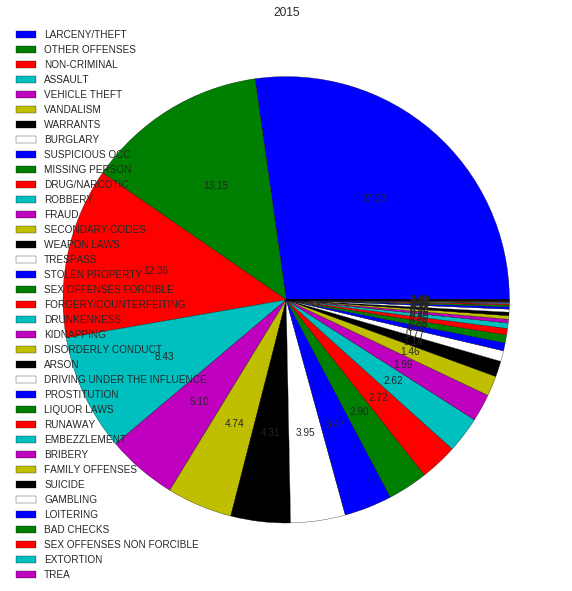

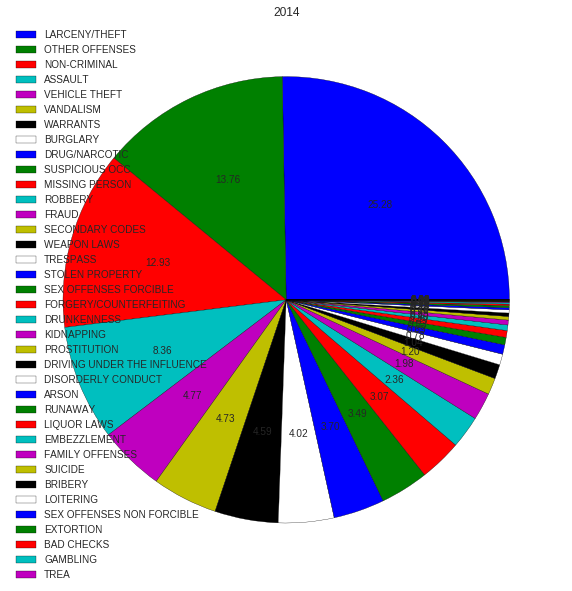

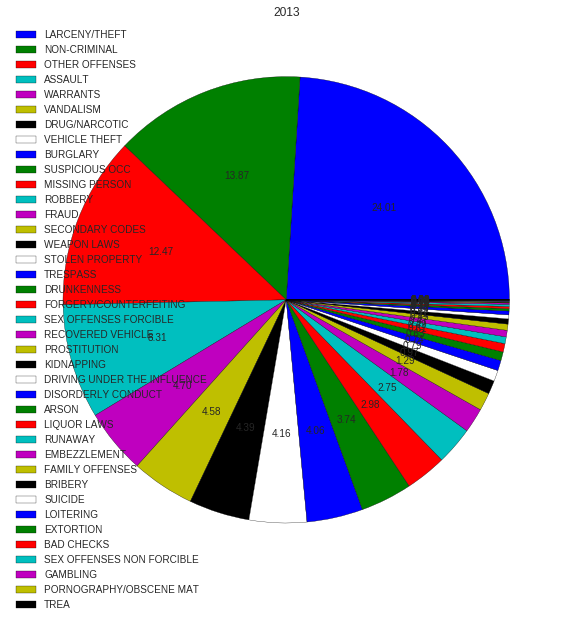

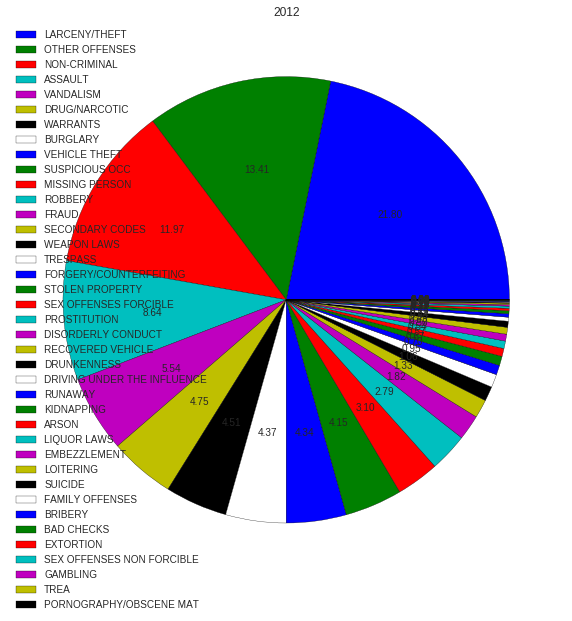

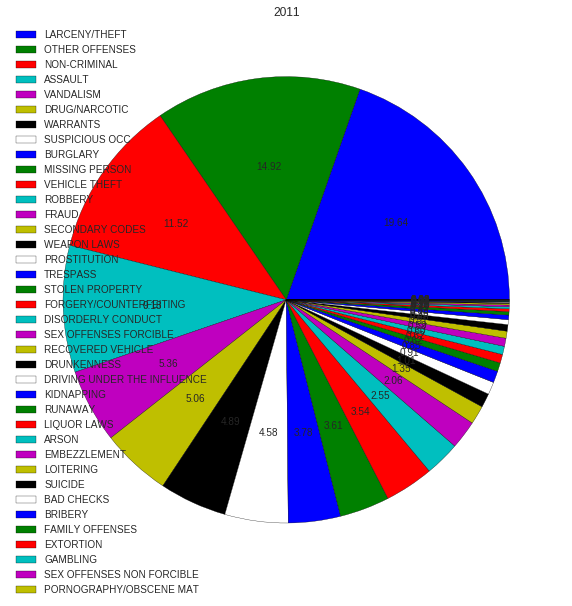

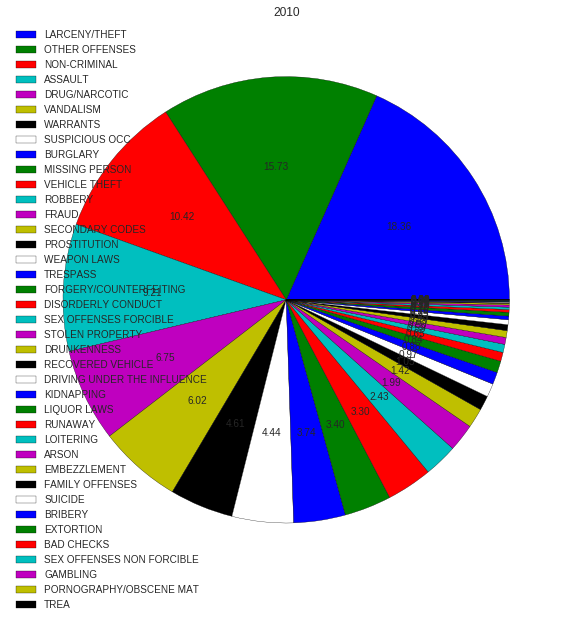

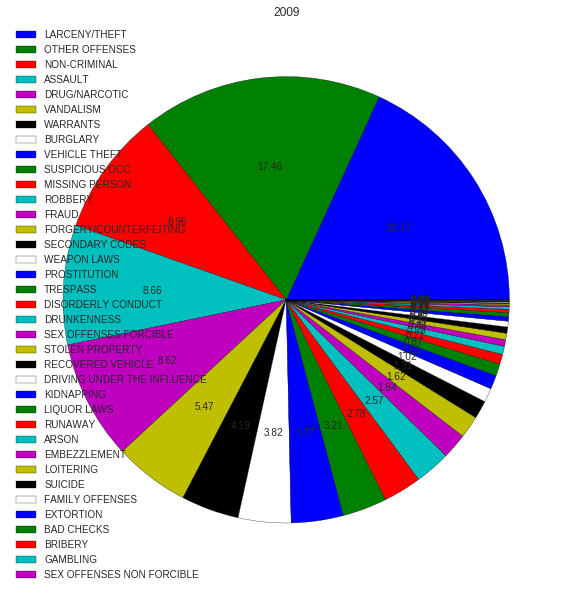

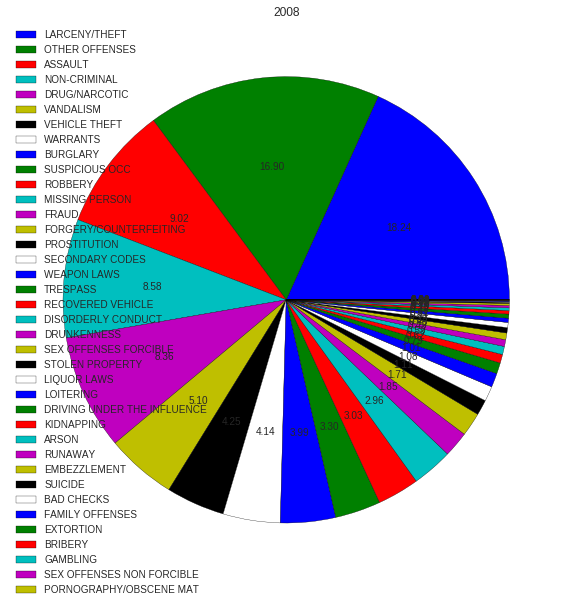

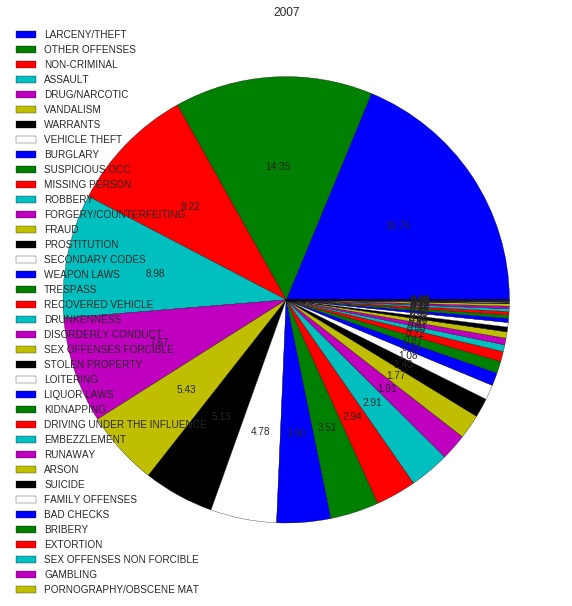

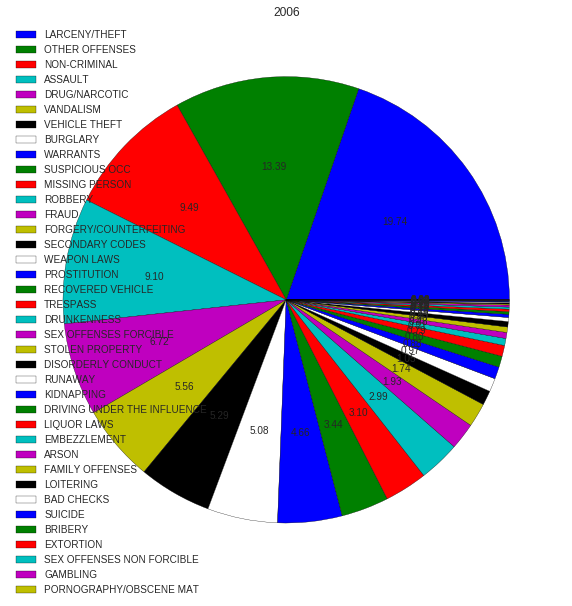

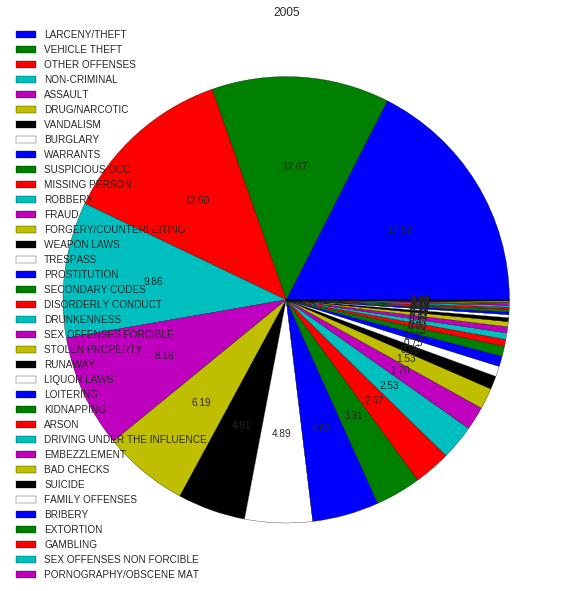

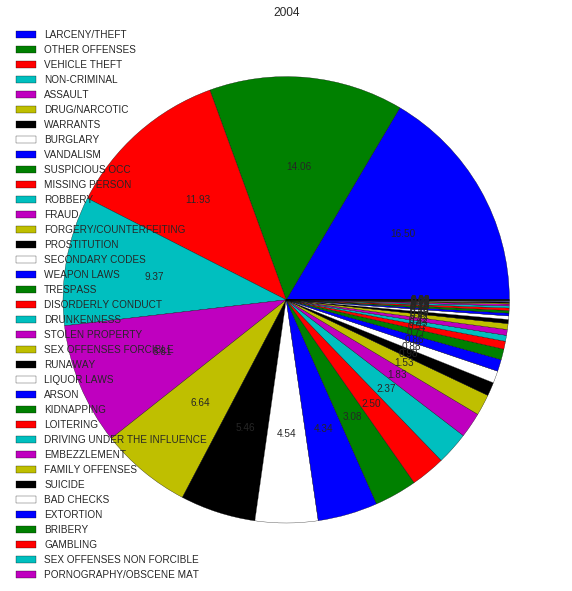

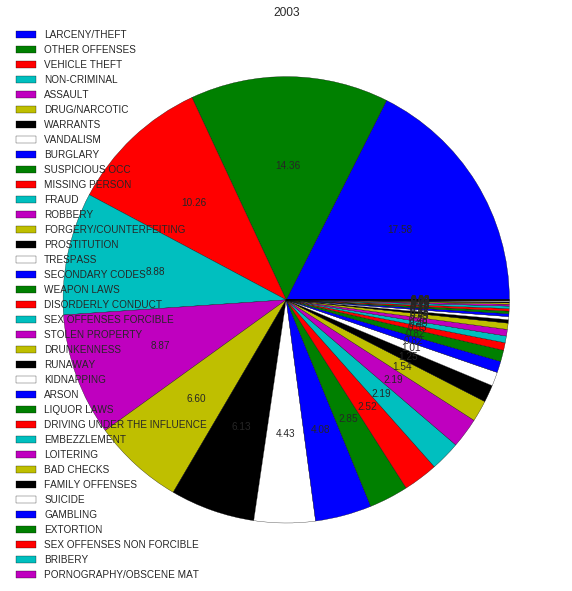

In [12]:
#let's first look at year-by-year information
for year in tr_master.Years.unique():
    cats = tr_master.Category[tr_master.Years == year].value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(cats, autopct='%.2f')
    plt.title(year)
    plt.legend(cats.index, loc='best')

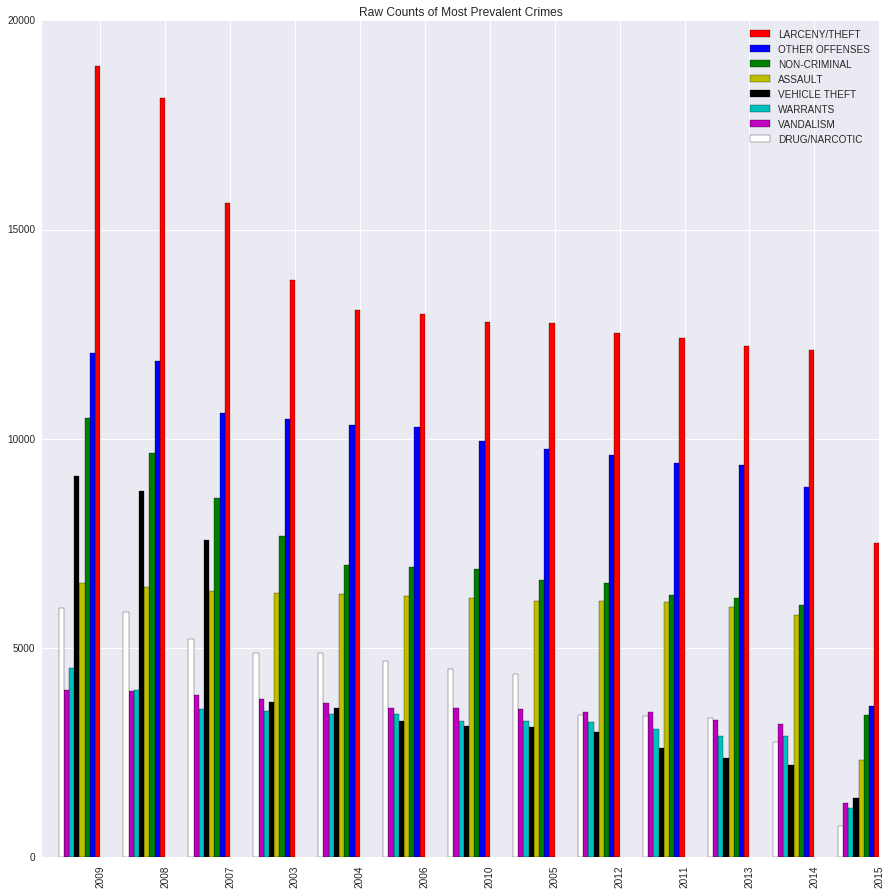

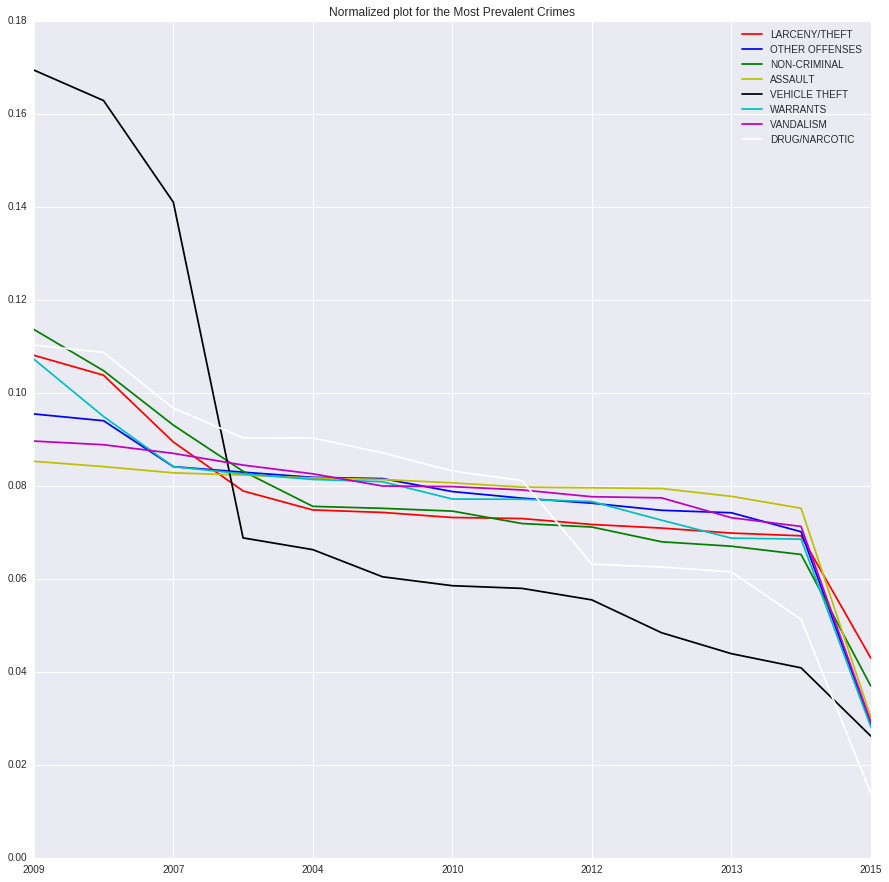

In [42]:
#looking at the year by year pie charts isn't super telling, intead let's look at the top crimes over time 
#and look at both raw and normalized counts

#set up for plotting)
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for year in tr_master.Years.unique():
    cats = tr_master.Category[tr_master.Years==year].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

#raw counts
plt.figure(figsize=(15,15))
for crime in top_crime:
    tr_master.Years[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Raw Counts of Most Prevalent Crimes')

#normalized counts across the years for each crime
plt.figure(figsize=(15,15))
for crime in top_crime:
    tr_master.Years[tr_master.Category==crime].value_counts('normalize').plot(color = colors[count])
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Normalized plot for the Most Prevalent Crimes')

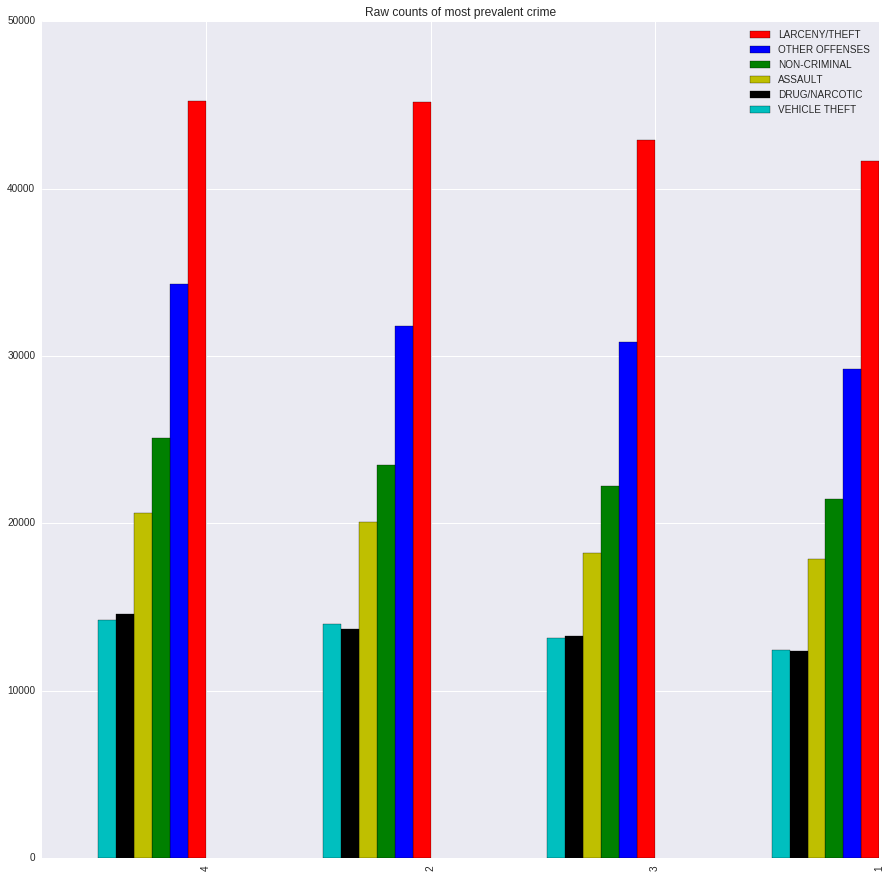

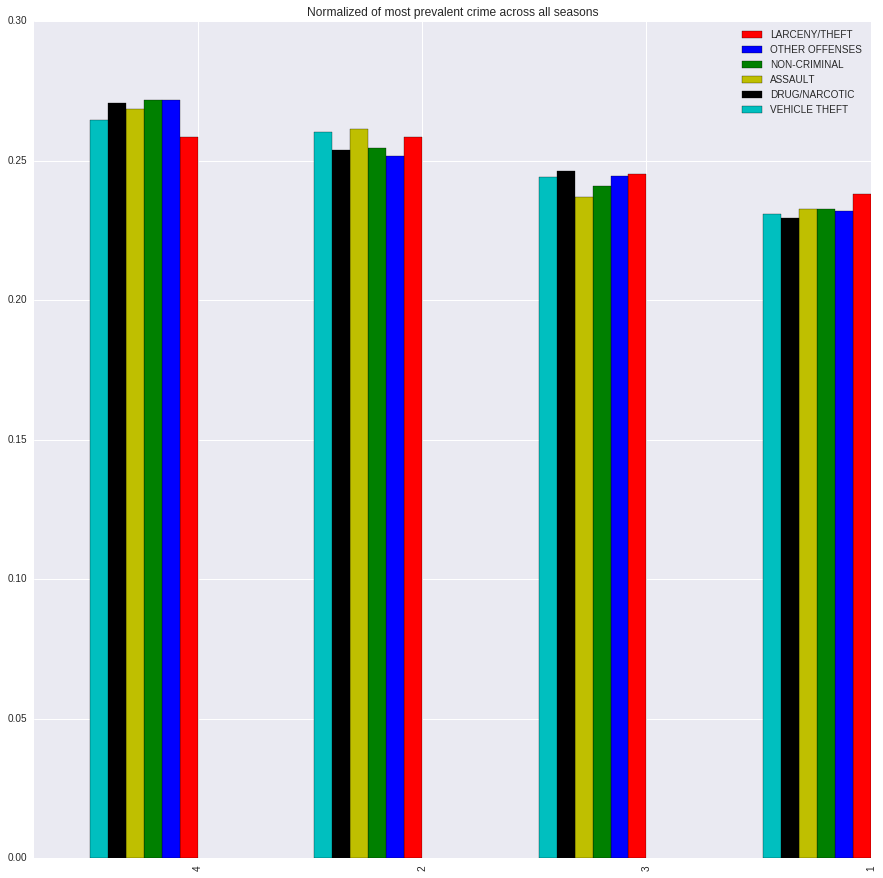

In [45]:
#taking a look at crime in each season
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for season in tr_master.Season.unique():
    cats = tr_master.Category[tr_master.Season==season].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

plt.figure(figsize=(15,15))
for crime in top_crime:
    tr_master.Season[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Raw counts of most prevalent crime')

plt.figure(figsize=(15,15))
count = 0
for crime in top_crime:
    tr_master.Season[tr_master.Category==crime].value_counts('normalize').plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Normalized of most prevalent crime across all seasons')

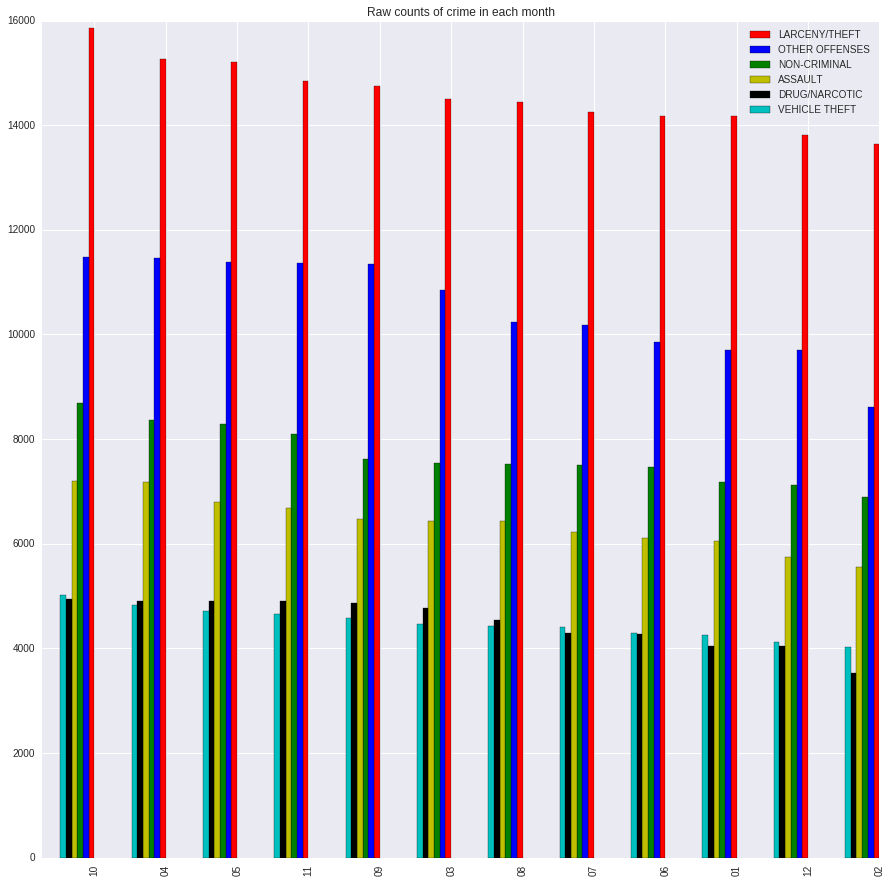

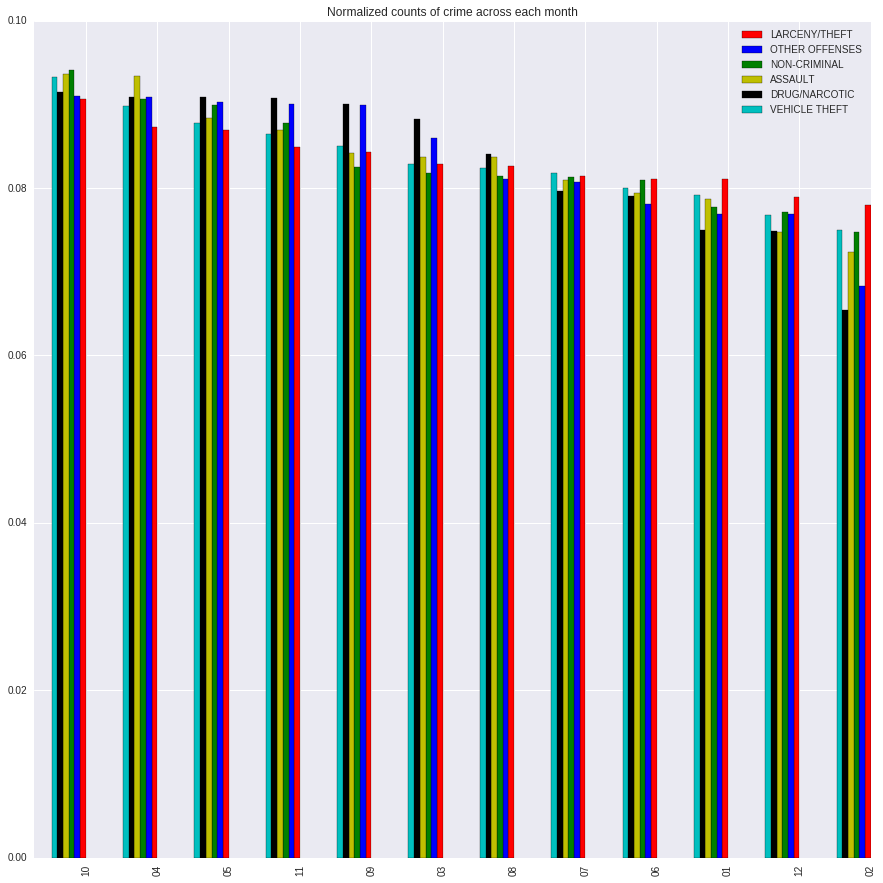

In [46]:
#taking a look at crime in each month
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for month in tr_master.Month.unique():
    cats = tr_master.Category[tr_master.Month==month].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

plt.figure(figsize=(15,15))
for crime in top_crime:
    tr_master.Month[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Raw counts of crime in each month')

plt.figure(figsize=(15,15))
count = 0
for crime in top_crime:
    tr_master.Month[tr_master.Category==crime].value_counts('normalize').plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1
plt.legend(top_crime,loc='best')
plt.title('Normalized counts of crime across each month')

These recodes show that there are two peaks in general crime during the year in the 'transition' months of the year, but across all years and seasons, crime distribution has remained relatively constant. The total amount of crime has dropped however. 

Now we look to see how crime types may have changed over time.

In [79]:
#let's recode all the crimes into a few bins
#warrants - RESPONSE - 01
#suspicious occ, trespass, loitering, trea - LOCATION - 02
#other offenses, vandalism, weapon laws, secondary codes, arson - OTHER - 03
#larceny/theft, robbery, burglery, vehicle theft, stolen property, recovered vehicle - THEIVING - 04
#forgery/counterfeiting, fraud, bribery, embezzlement, extortion, bad checks - MONEY - 05
#drug/narcotic - DRUG - 06
#non-criminal, drunkeness, driving under the influence, disorderly conduct, liquor laws - DRINK - 07
#assault, suicide - VIOLENT - 08
#sex offenses forcible, prostitution, sex offenses non forcible, pornography/obscene mat- SEX - 09
#missing person, kidnapping, runaway - MISSING -10
#family offenses - FAMILY - 11
#gambling - GAMBLING - 12

crime_recode = []
crime_dictionary = {'WARRANTS':1, 'SUSPICIOUS OCC':2, 'TRESPASS':2, 'LOITERING':2, 'TREA':2, 'OTHER OFFENSES':3, 
                    'VANDALISM':3, 'WEAPON LAWS':3, 'SECONDARY CODES':3, 'ARSON':3, 'LARCENY/THEFT':4, 'ROBBERY':4,
                   'BURGLARY':4, 'VEHICLE THEFT':4,'STOLEN PROPERTY':4,'RECOVERED VEHICLE':4, 'FORGERY/COUNTERFEITING':5,
                   'FRAUD':5,'BRIBERY':5,'EMBEZZLEMENT':5,'EXTORTION':5,'BAD CHECKS':5,'DRUG/NARCOTIC':6, 'NON-CRIMINAL':7,
                   'DRUNKENNESS':7, 'DRIVING UNDER THE INFLUENCE':7,'DISORDERLY CONDUCT':7,'LIQUOR LAWS':7, 'ASSAULT':8, 'SUICIDE':8,
                   'SEX OFFENSES FORCIBLE':9, 'PROSTITUTION':9, 'SEX OFFENSES NON FORCIBLE':9, 'PORNOGRAPHY/OBSCENE MAT':9,
                   'MISSING PERSON': 10, 'KIDNAPPING':10, 'RUNAWAY':10, 'FAMILY OFFENSES':11, 'GAMBLING':12}
for crime in tr_master.Category:
    crime_recode.append(crime_dictionary[crime])

tr_master['Cat_Recode'] = crime_recode    

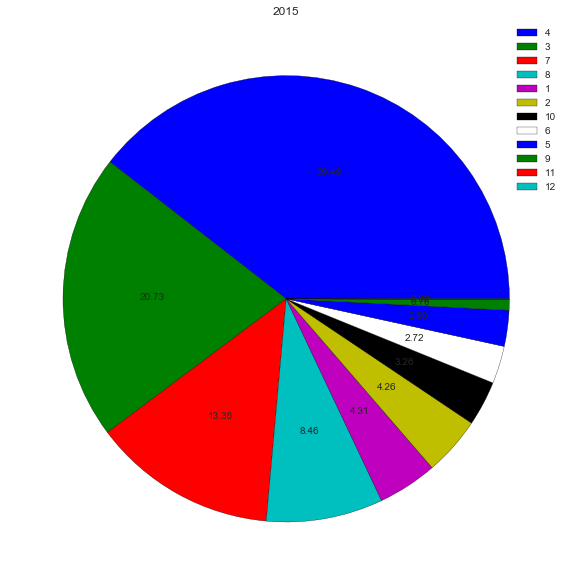

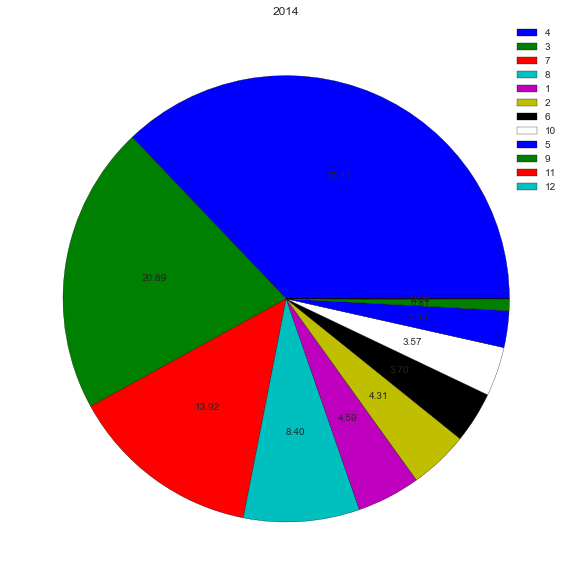

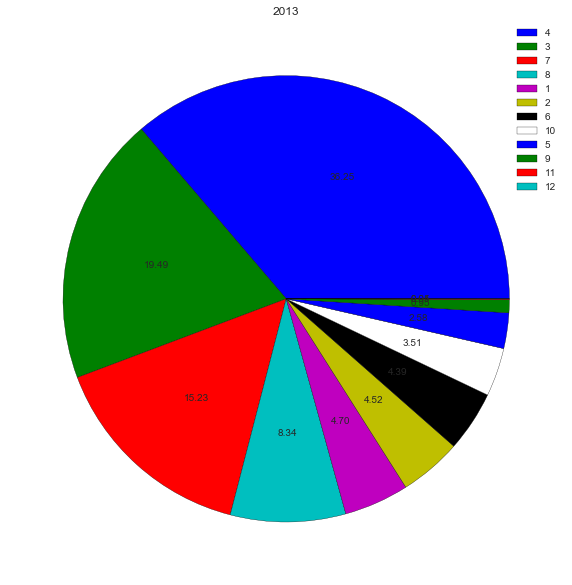

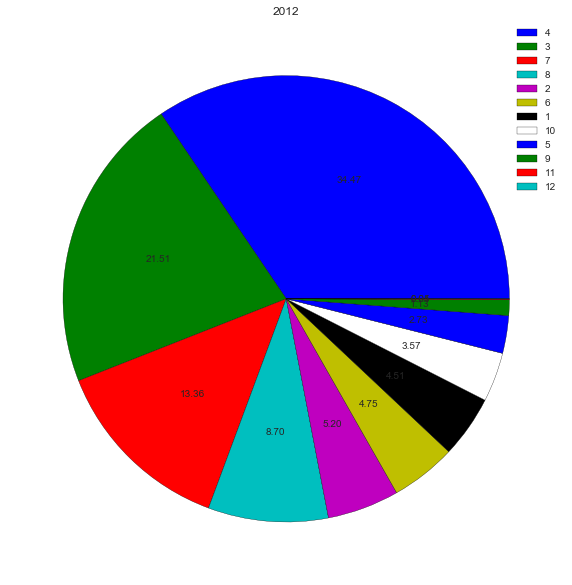

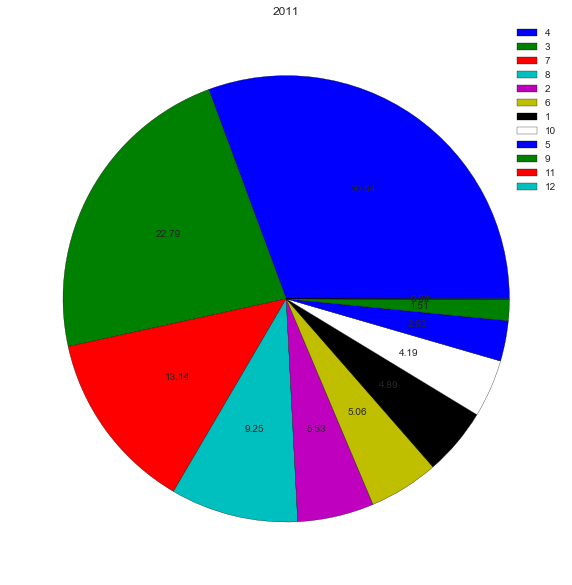

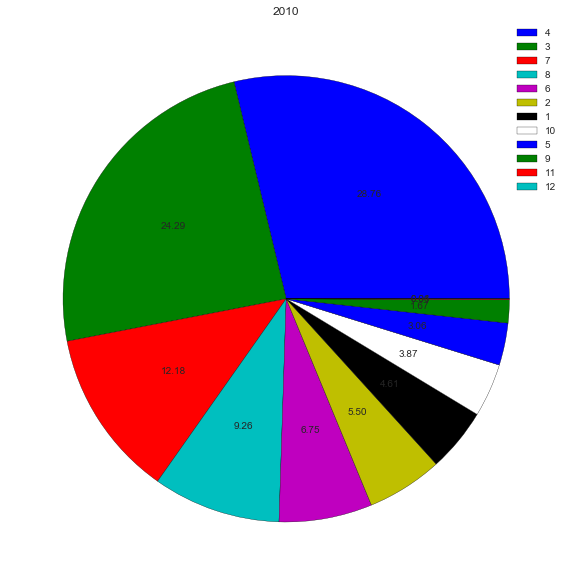

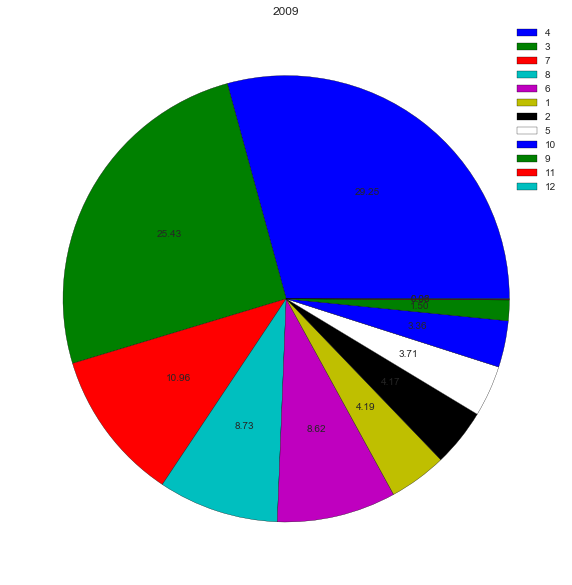

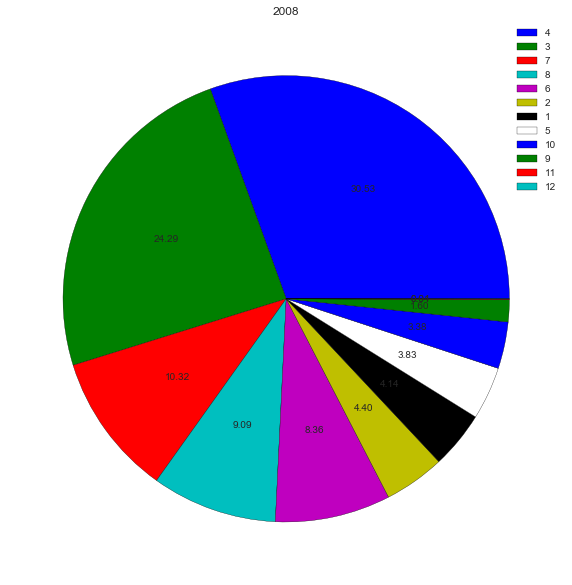

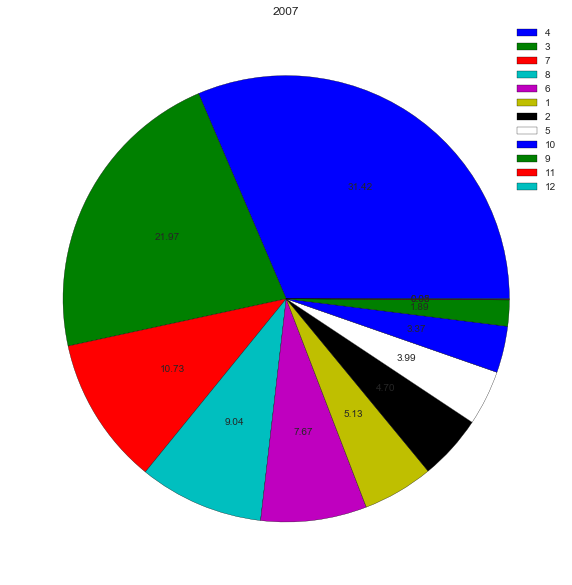

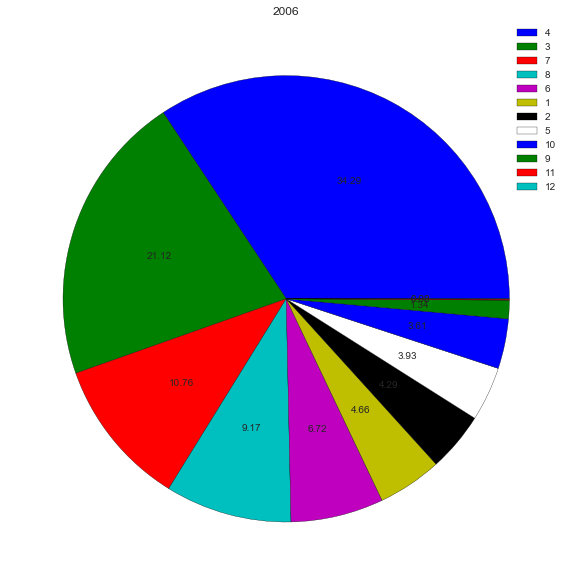

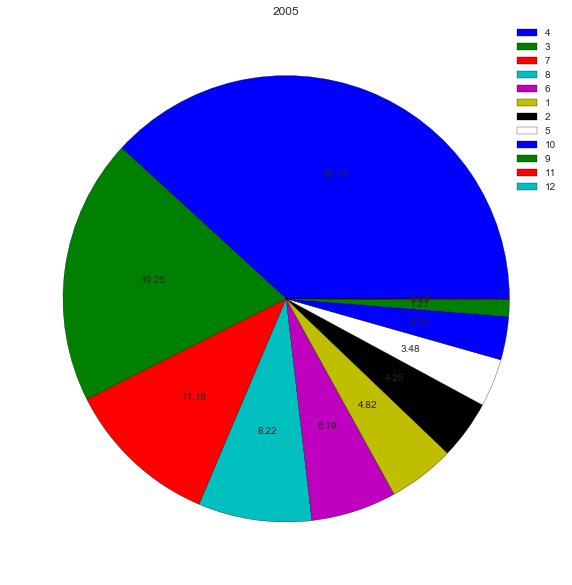

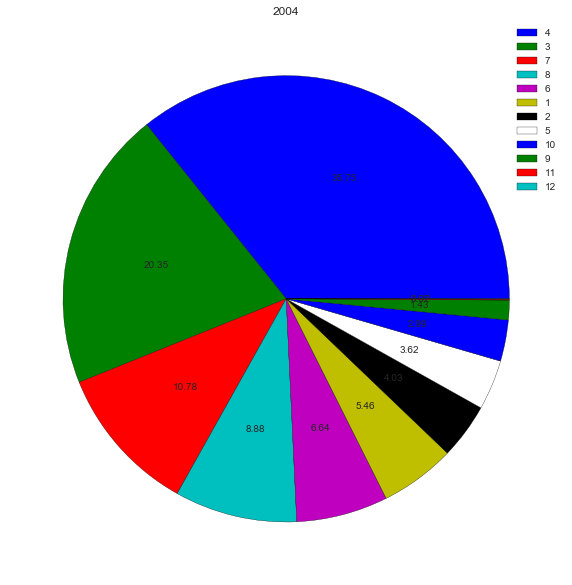

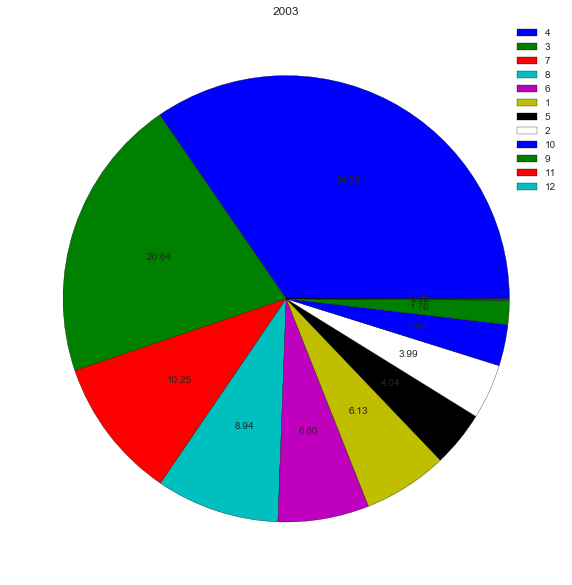

In [11]:
for year in tr_master.Years.unique():
    cats = tr_master.Cat_Recode[tr_master.Years == year].value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(cats, autopct='%.2f')
    plt.title(year)
    plt.legend(cats.index, loc='best')

Relatively interesting. Let's take this recode and look at time of the day - since we know that crime over all these years has remained proportionally equal, we can take a gander at when those reports get filed...which will either be a pattern of reporting, or may indicate the time of day in which these crimes get committed.

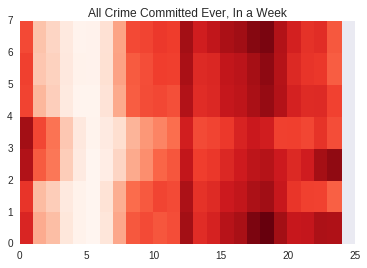

In [70]:
grouped = tr_master.groupby(['DayOfWeek', 'Hour']).Category.count()
data=grouped.values
test=data.reshape(7,24)
#data = np.random.rand(7,24)
columns = tr_master['Hour'].unique()
rows = tr_master['DayOfWeek'].unique()
plt.pcolor(test,cmap=plt.cm.Reds)
plt.title('All Crime Committed Ever, In a Week')
plt.show()

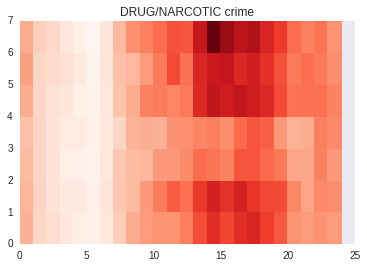

In [75]:
grouped = tr_master[tr_master.Category=='DRUG/NARCOTIC'].groupby(['DayOfWeek', 'Hour']).Category.count()
data=grouped.values
test=data.reshape(7,24)
#data = np.random.rand(7,24)
columns = tr_master['Hour'].unique()
rows = tr_master['DayOfWeek'].unique()
plt.pcolor(test,cmap=plt.cm.Reds)
plt.title('DRUG/NARCOTIC crime')
plt.show()

In using these plots, we do have some sense that certain crimes either occur or get reported at certain times, meaning that it seems like this aspect will be useful moving forward in modeling.

All of what we've looked at so far is temporal mapping. Now, we look at the spatial aspect. First let's get a sense of mapping with a few crimes:

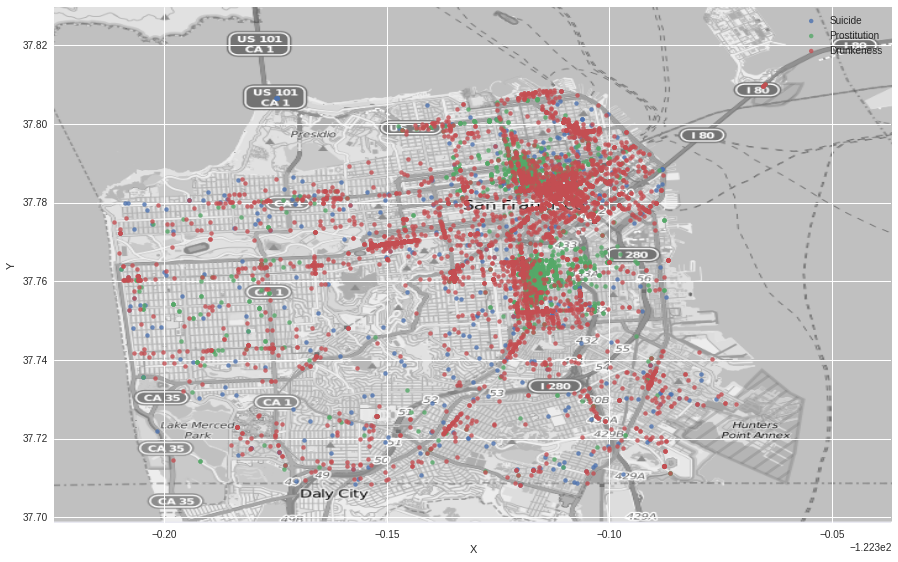

In [77]:
#probably want to generate either a "relative map" which is actually just
#a scatter plot from the X,Y data with color/size of dots related to type
#or amount of crime
plt.figure(figsize=(15,15))
plt.axis([-122.52469, -122.33663, 37.69862, 37.82986])
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
ax = sns.regplot(tr_master[tr_master.Category == 'SUICIDE'].X, tr_master[tr_master.Category == 'SUICIDE'].Y, fit_reg=False)
ax = sns.regplot(tr_master[tr_master.Category == 'PROSTITUTION'].X, tr_master[tr_master.Category == 'PROSTITUTION'].Y, fit_reg=False)
ax = sns.regplot(tr_master[tr_master.Category == 'DRUNKENNESS'].X, tr_master[tr_master.Category == 'DRUNKENNESS'].Y, fit_reg=False)
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
plt.legend(['Suicide', 'Prostitution', 'Drunkeness'])

Let's get a sense of those recodes we did earlier:

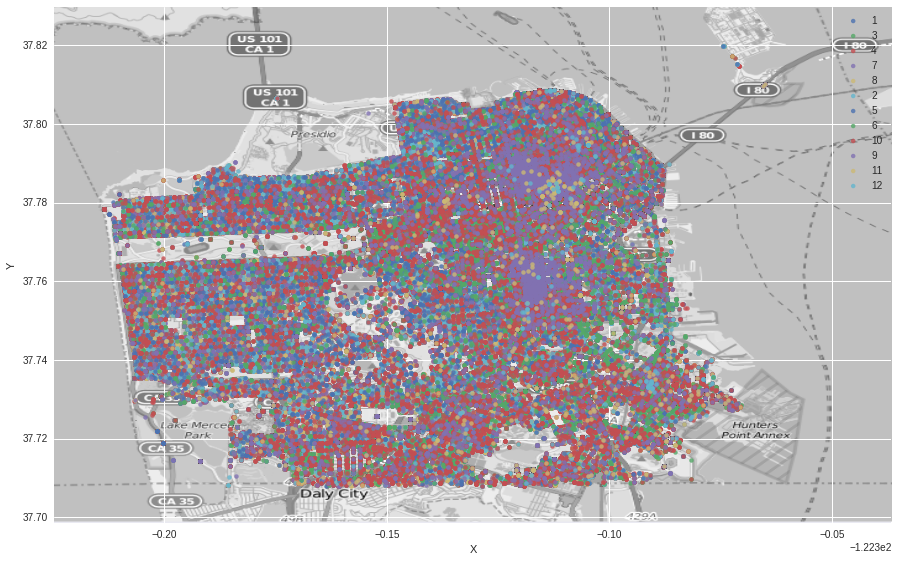

In [89]:
plt.figure(figsize=(15,15))
plt.axis([-122.52469, -122.33663, 37.69862, 37.82986])
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
legend = []

for recode in tr_master.Cat_Recode.unique():
    ax = sns.regplot(tr_master[tr_master.Cat_Recode == int(recode)].X, tr_master[tr_master.Cat_Recode==recode].Y, fit_reg=False)
    legend.append(recode)
    
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
plt.legend(legend)


#warrants - RESPONSE - 01
#suspicious occ, trespass, loitering, trea - LOCATION - 02
#other offenses, vandalism, weapon laws, secondary codes, arson - OTHER - 03
#larceny/theft, robbery, burglery, vehicle theft, stolen property, recovered vehicle - THEIVING - 04
#forgery/counterfeiting, fraud, bribery, embezzlement, extortion, bad checks - MONEY - 05
#drug/narcotic - DRUG - 06
#non-criminal, drunkeness, driving under the influence, disorderly conduct, liquor laws - DRINK - 07
#assault, suicide - VIOLENT - 08
#sex offenses forcible, prostitution, sex offenses non forcible, pornography/obscene mat- SEX - 09
#missing person, kidnapping, runaway - MISSING -10
#family offenses - FAMILY - 11
#gambling - GAMBLING - 12

Obviously, crime happens everywhere. Let's create some density maps to see if different types of crime get localized differently:

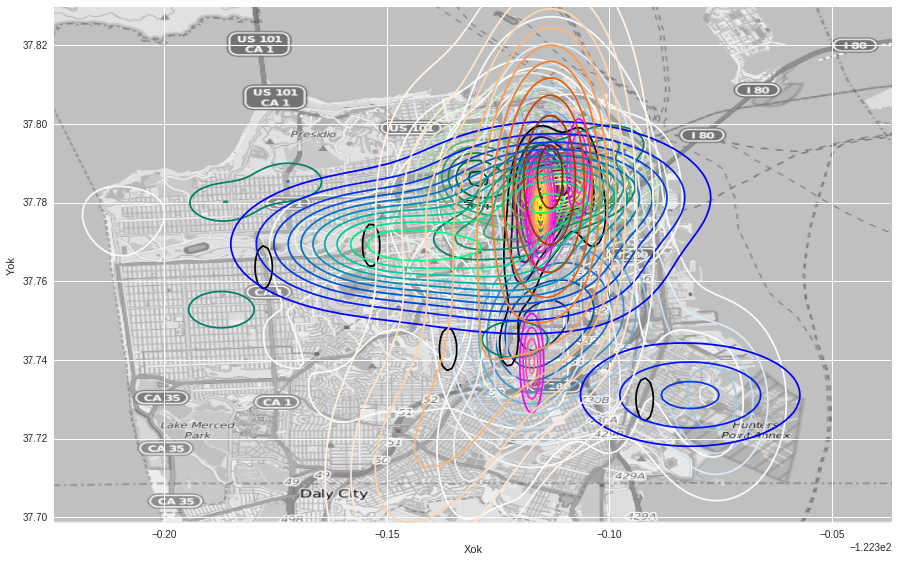

In [120]:
plt.figure(figsize=(15,15))
plt.axis([-122.52469, -122.33663, 37.69862, 37.82986])
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
legend = []

tr_master['Xok'] = tr_master[tr_master.X<-121].X
tr_master['Yok'] = tr_master[tr_master.Y<40].Y


count = 0
colors = ['Reds', 'Greens', 'Blues', 'Purples', 'magma', 'summer', 'spring', 'winter', 'Oranges', 'dusty purple', 'windows blue', 'brown']
for recode in tr_master.Cat_Recode.unique():
    crime = tr_master.loc[tr_master.Cat_Recode == recode]
    ax = sns.kdeplot(crime.Xok, crime.Yok, shade=False, shade_lowest=False, cmap=colors[count], legend=True)
    legend.append(recode)
    count += 1
    
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

plt.legend(legend)

In this exploration we found that while net crime has decreased, the distrubution of types of crime has remained relatively constant - meaning for the model that crime in 2003 could still impact our predictions for crime in 2014. We also see some spatial relationships in which some types of crimes are localized to specific areas which may be different from other types of crimes. We also know that the localization of these crimes may have changed locations over time, and so we want to be sure to capture that relationship in some way in our model.